In [1]:
from interpolator import *
from age import *

In [2]:
def make_age_grid_HRD(age_steps):
    intervals=[]
    intervals.extend(age_steps)
    
    with open(INTERP_PATH+'/YaPSI.age', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(zip(intervals))


In [3]:
def create_model_HRD(age_steps=[0.001,0.01,0.020],FeH=0.07,Y=0.280,grid="WL11"):
    model_final={"age":[],"mass":[],"logT":[],"logL":[],"logg":[],"Mv":[]}
    make_age_grid_HRD(age_steps)
    make_Fe_Y_grid(FeH,Y,grid)
    os.system('rm '+INTERP_PATH+'/test.out')
    FNULL = open(os.devnull, 'w')
    p = subprocess.Popen('./interp', cwd=INTERP_PATH,stdout=FNULL, stderr=subprocess.STDOUT)
    p.wait()
    model=read_models()
    model_final['age']=model['age'][0]
    model_final['mass']=model['mass'][0]
    model_final['logT']=model['logT'][0]
    model_final['logL']=model['logL'][0]
    model_final['logg']=model['logg'][0]
    model_final['Mv']=model['Mv'][0]
    return(model_final)


In [8]:
age_steps=[0.03,0.035,0.04,0.05,0.1,0.2,0.3,0.5]
model=create_model_HRD(age_steps=age_steps,FeH=0.07+0.028)

In [9]:
stars=read_stars('final_parameters.csv')
name='HD129333'

f = stars['id'] == name
star=stars[f]
print star

   id    teff  logg feh_model ... err_v         Mv               err_Mv       
-------- ---- ----- --------- ... ----- ----------------- --------------------
HD129333 5814 4.525     0.028 ... 0.009 4.913010764626638 0.009223867629966772


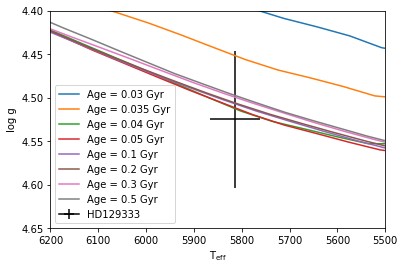

In [10]:
for i in np.arange(len(age_steps)):
    a = model['age'] == age_steps[i]
    plt.plot(10**model['logT'][a],model['logg'][a], label='Age = {i} Gyr'.format(i=age_steps[i]))
    
plt.errorbar(star['teff'],star['logg'],xerr=star['err_teff'],yerr=star['err_logg'],label=name, color='black')
plt.legend(loc='best')
plt.xlim([6200,5500])
plt.ylim([4.65,4.4])
plt.xlabel(r'T$_{\rm eff}$')
plt.ylabel('log g')
plt.show()